In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import time

In [3]:
root = "."
train = False

images = [f"{root}/test-images/dve-skode.jpg"]
withboxes = []

In [7]:
model = YOLO(f"{root}/runs/detect/train6/weights/best.pt")
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00446      0.485 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.63       2.13 torch.float32
    2                          model.0.bn.bias     False           16                 [16]       0.53       4.27 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00264      0.189 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       4.99       1.14 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.763       1.67 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]    -0.0401      0.287 torch.float3

(225, 3011043, 0, 8.1941504)

In [5]:
images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_RGB2BGR) for img in images]

results = model(images)
# stupid fix that works
time.sleep(0.1)
for i, result in enumerate(results):
    image = images[i]
    for x1, y1, x2, y2 in result.boxes.xyxy:
        print(x1, y1, x2, int(y2))
        image = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    withboxes.append(image)

/home/user/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0

0: 640x640 2 License_Plates, 128.8ms
Speed: 6.5ms preprocess, 128.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


tensor(1322.5288) tensor(1001.4703) tensor(1480.7388) 1065
tensor(413.3199) tensor(1035.9155) tensor(560.1445) 1098


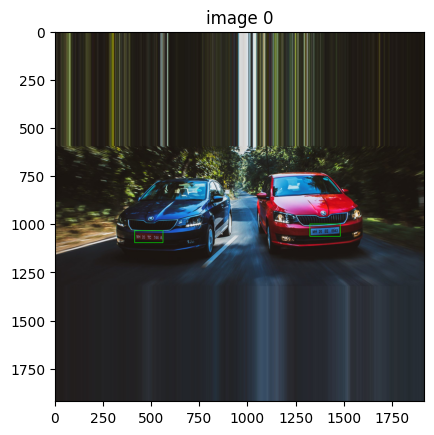

In [6]:
for i, img in enumerate(withboxes):
    plt.imshow(img)
    plt.title(f"image {i}")
    plt.show()

In [ ]:
["AL","AR","AC","BB","BG","BO","BP","BT","BĆ","BU","BČ","VA","VB","VL","VP","VR","VS","VŠ","GL","GM","DE","ĐA","ZA","ZR","IN","IC","JA","KA","KC","KV","KG","KŽ","KI","KL","KM","KO","KŠ","LB","LE","LO","LU","NV","NG","NI","NP","NS","PA","PB","PE","PŽ","PZ","PI","PK","PN","PO","PP","PR","PT","RA","RU","SA","SV","SD","SJ","SM","SO","SP","ST","SU","SC","TO","TS","TT","ĆU","UB","UE","UR","ČA","ŠA","ŠI"]